In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('medical_cost.csv')

In [ ]:
dataset.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.shape

(1338, 8)

In [ ]:
dataset.isnull().sum()

,0
Id,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
dataset.drop(columns=["Id"],inplace=True)

In [ ]:
dataset.duplicated().sum()

1

In [ ]:
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [ ]:
dataset.shape

(1337, 7)

In [ ]:
dataset["smoker"].unique(),dataset["region"].unique(),dataset["sex"].unique()

(array(['yes', 'no'], dtype=object),
 array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object),
 array(['female', 'male'], dtype=object))

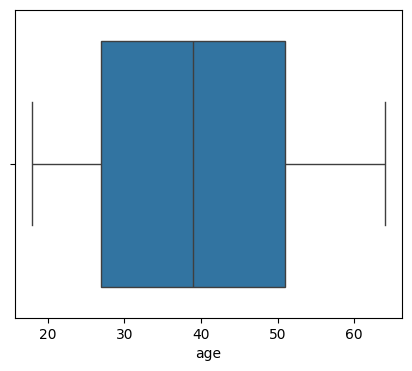

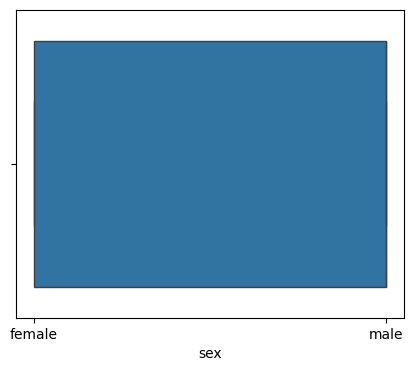

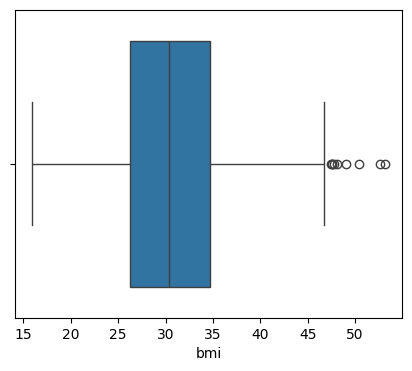

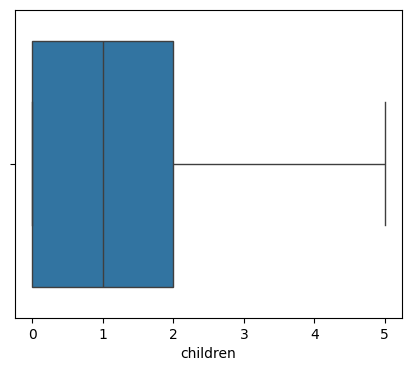

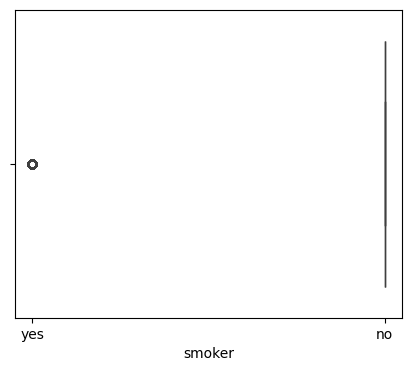

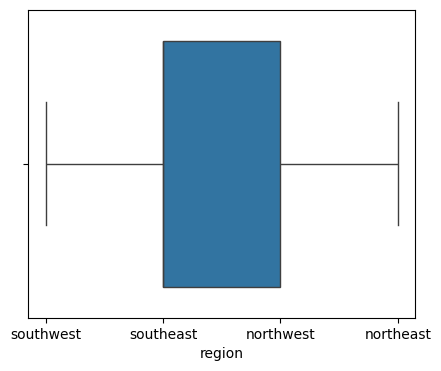

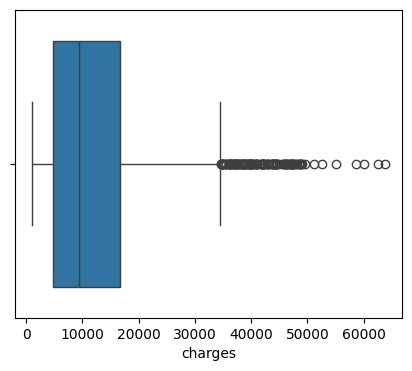

In [ ]:
for i in dataset.columns:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=dataset[i])
    plt.show()

In [ ]:
q1=dataset['bmi'].quantile(0.25)
q3=dataset['bmi'].quantile(0.75)
iqr=q3-q1

In [ ]:
min_val=q1-1.5*iqr
max_val=q3+1.5*iqr

In [ ]:
dataset=dataset[(dataset['bmi']>=min_val) & (dataset['bmi']<=max_val)]

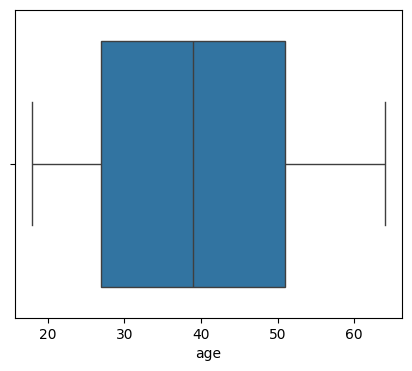

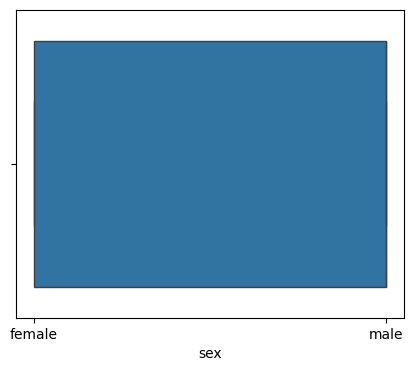

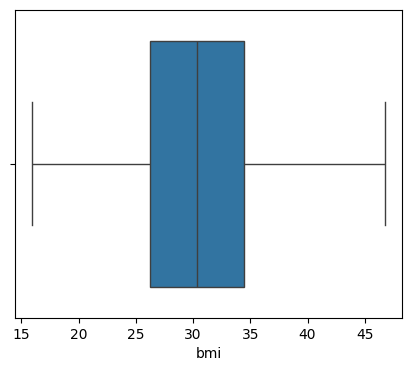

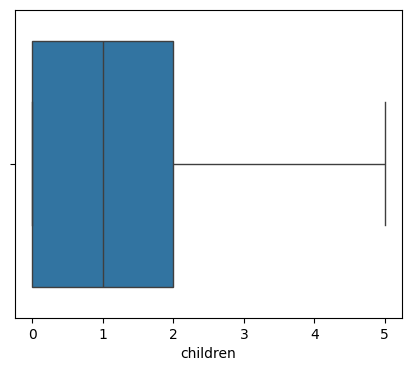

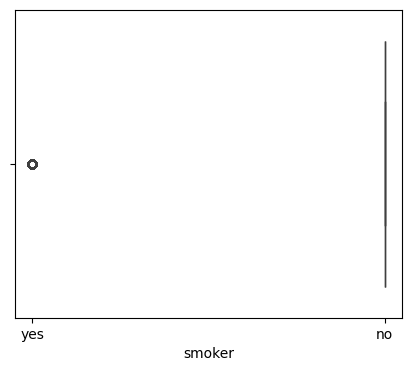

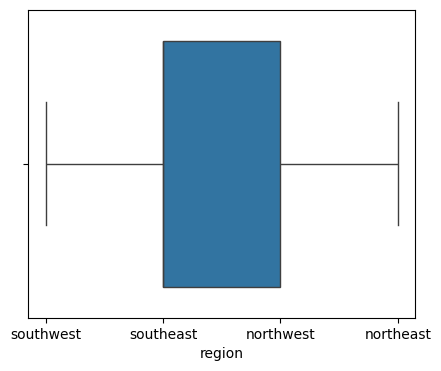

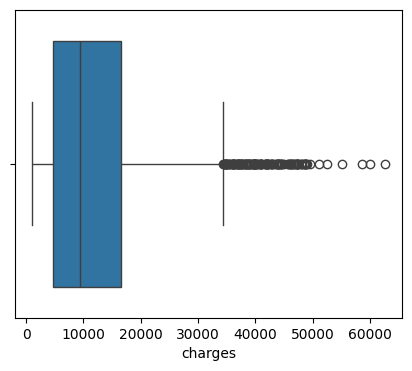

In [ ]:
for i in dataset.columns:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=dataset[i])
    plt.show()

In [ ]:
x=dataset.iloc[:,:-1]
y=dataset["charges"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
x['sex'] = x['sex'].str.strip()
x['smoker'] = x['smoker'].str.strip()

ohe = OneHotEncoder(drop="first", sparse_output=False)
ar = ohe.fit_transform(x[["sex", "smoker"]])
en_data = pd.DataFrame(ar, columns=["sex_male", "smoking_yes"], index=x.index)

x[["sex_male", "smoking_yes"]] = en_data

In [ ]:
x.head()

,age,sex,bmi,children,smoker,region,sex_male,smoking_yes
0,19,female,27.900,0,yes,southwest,0.0,1.0
1,18,male,33.770,1,no,southeast,1.0,0.0
2,28,male,33.000,3,no,southeast,1.0,0.0
3,33,male,22.705,0,no,northwest,1.0,0.0
4,32,male,28.880,0,no,northwest,1.0,0.0


In [ ]:
x.drop(columns=["sex","smoker"],inplace=True)

In [ ]:
x.head()

,age,bmi,children,region,sex_male,smoking_yes
0,19,27.900,0,southwest,0.0,1.0
1,18,33.770,1,southeast,1.0,0.0
2,28,33.000,3,southeast,1.0,0.0
3,33,22.705,0,northwest,1.0,0.0
4,32,28.880,0,northwest,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
le.fit(x['region'])
x['region']=le.transform(x['region'])

In [ ]:
x.head()

,age,bmi,children,region,sex_male,smoking_yes
0,19,27.900,0,3,0.0,1.0
1,18,33.770,1,2,1.0,0.0
2,28,33.000,3,2,1.0,0.0
3,33,22.705,0,1,1.0,0.0
4,32,28.880,0,1,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(75.05837312789694, 74.44762584926316)

In [ ]:
from sklearn.linear_model import Lasso,Ridge

In [ ]:
la=Lasso(alpha=0.5)
la.fit(x_train,y_train)

Lasso(alpha=0.5)

In [ ]:
la.score(x_train,y_train)*100,la.score(x_test,y_test)*100

(75.05837092828554, 74.4488373667305)

In [ ]:
ri=Ridge(alpha=0.5)
ri.fit(x_train,y_train)

Ridge(alpha=0.5)

In [ ]:
ri.score(x_train,y_train)*100,ri.score(x_test,y_test)*100

(75.05784690738932, 74.45648235875915)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(99.88106710661484, 61.87801235599193)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
bg=BaggingRegressor(estimator=LinearRegression(),n_estimators=10)
bg.fit(x_train,y_train)

BaggingRegressor(estimator=LinearRegression())

In [ ]:
bg.score(x_train,y_train)*100,bg.score(x_test,y_test)*100

(75.04141427999488, 74.47697958835914)

In [ ]:
rf=RandomForestRegressor(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

(97.27436762313933, 80.26191148375065)

In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(lr, f)
